In [27]:
import numpy as np
import util
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split

In [28]:
trainfile = 'data/train.csv'
header, ids, X, Y = util.fetch_data(trainfile)

seed=229
np.random.seed(seed)

test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [29]:
clf = GaussianNB()
clf.fit(X, Y)

GaussianNB(priors=None)

In [30]:
print(util.gini_scorer(clf, X, Y))

0.0640193274759


In [31]:
trainsizes, traingini, testgini = util.learning_curves(clf, X_train, X_test, y_train, y_test)
print(traingini)
print('')
print(testgini)
plt.figure()
plt.plot(trainsizes, traingini, label='train gini')
plt.plot(trainsizes, testgini, label='test gini')
plt.xlabel('Training set size')
plt.ylabel('Normalized Gini coefficient')
plt.title('Gaussian Naive Bayes')
plt.legend()
plt.savefig('figures/learning_curves/gaussianNB.eps', format='eps', dpi=1000)

Evaluating model on training set size 23808
Evaluating model on training set size 47616
Evaluating model on training set size 71425
Evaluating model on training set size 95233
Evaluating model on training set size 119042
Evaluating model on training set size 142850
Evaluating model on training set size 166659
Evaluating model on training set size 190467
Evaluating model on training set size 214276
Evaluating model on training set size 238084
Evaluating model on training set size 261892
Evaluating model on training set size 285701
Evaluating model on training set size 309509
Evaluating model on training set size 333318
Evaluating model on training set size 357126
Evaluating model on training set size 380935
Evaluating model on training set size 404743
Evaluating model on training set size 428552
Evaluating model on training set size 452360
Evaluating model on training set size 476169
[0.025025008156614417, 0.037997509710256151, 0.049544227978058769, 0.054010614399566795, 0.0513602840514

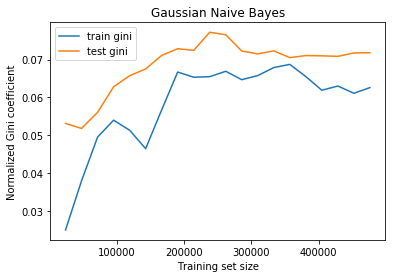

In [32]:
plt.show()

In [33]:
#util.make_prediction(clf, 'data/test.csv', 'predictions/gaussian_nb.csv',
                     #lambda X_test: clf.predict_proba(X_test)[:,1])

In [34]:
dlf = MultinomialNB()
dlf.fit(np.maximum(X,0), Y) # some -1's in X indicate unknown values; need to handle these

print(util.gini_scorer(dlf, np.maximum(X,0), Y))


0.0372495399354


In [35]:
#util.make_prediction(clf, 'data/test.csv', 'predictions/multinomial_nb.csv',
                     lambda X_test: dlf.predict_proba(X_test)[:,1])

IndentationError: unexpected indent (<ipython-input-35-e9b7e67d6529>, line 2)